In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# load data
DATA_FILE_PATH = 'C:/Users/Celine/Downloads/GlobalWarmingTrends/'
DATA_FILE_NAME_GLOBAL = 'GlobalTemperatures.csv'
DATA_FILE_NAME_CITY = 'GlobalLandTemperaturesByCity.csv'

df_global = pd.read_csv(DATA_FILE_PATH + DATA_FILE_NAME_GLOBAL)
df_global['dt'] = pd.to_datetime(df_global['dt'], format='%Y-%m-%d')

df_per_city = pd.read_csv(DATA_FILE_PATH + DATA_FILE_NAME_CITY)
df_per_city['date'] = pd.to_datetime(df_per_city['date'], format='%Y-%m-%d')

Can global warming be observed on earth's temperature evolution?

In [26]:
# average for each year
average_temp_per_year_df = pd.DataFrame({ "year": [], "land_temp_per_year": [], "land_and_ocean_temp_per_year": []})

years = list(range(1750, 2015+1))

for year in years:
    filtered_df = df_global.loc[(df['dt'] >= str(year) + '-01-01')
                     & (df_global['dt'] < str(year) +'-12-02')]
    mean_land = filtered_df.LandAverageTemperature.mean()
    mean_land_and_ocean = filtered_df.LandAndOceanAverageTemperature.mean(skipna=True)
    average_temp_per_year_df.loc[len(average_temp_per_year_df)] = [year, mean_land, mean_land_and_ocean]

display(average_temp_per_year_df.sort_values(by=['year']))


,year,land_temp_per_year,land_and_ocean_temp_per_year
0,1750.0,8.719364,NaN
1,1751.0,7.976143,NaN
2,1752.0,5.779833,NaN
3,1753.0,8.388083,NaN
4,1754.0,8.469333,NaN
...,...,...,...
261,2011.0,9.516000,15.769500
262,2012.0,9.507333,15.802333
263,2013.0,9.606500,15.854417
264,2014.0,9.570667,15.913000


Can the average country temperature be plotted in a compact way? you may take a (logical) sample of countries. You may also get the year’s average temperature for each.

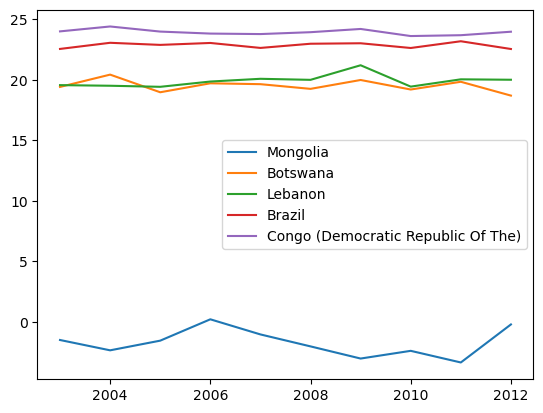

In [48]:
# get average temperature per country
countries = list(set(df_per_city.Country.to_list()))
years = range(2003, 2013)

for country in countries[:5]:
    # get average temperature
    df_country = df_per_city.loc[df_per_city["Country"] == country]
    mean_country_temp = df_country.AverageTemperature.mean()
    #print(country, mean_country_temp)
    df_country_year = df_country.groupby(df_country.date.dt.year)['AverageTemperature'].mean()
    #display(df_country_year.tail(10))
    plt.plot(years, df_country_year.tail(10).to_list(), label = country)

plt.legend()
plt.show()

What does the comparison of the evolution of the temperature
between two drastically different countries (location wise) allow you to
observe?

In [ ]:
# compare with max lat vs min lat
# compare with max long vs min long

Can the average city temperature be plotted in a compact way? you may take a (logical) sample of cities. You may also get the year’s average temperature for each.

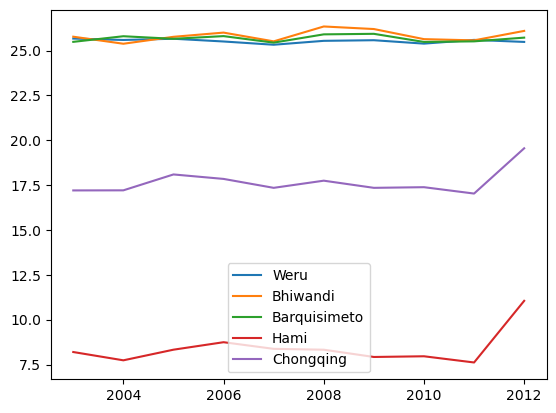

In [49]:
cities = list(set(df_per_city.City.to_list()))
years = range(2003, 2013)

for city in cities[:5]:
    # get average temperature
    df_city = df_per_city.loc[df_per_city["City"] == city]
    mean_city_temp = df_city.AverageTemperature.mean()
    df_city_year = df_city.groupby(df_city.date.dt.year)['AverageTemperature'].mean()
    plt.plot(years, df_city_year.tail(10).to_list(), label = city)

plt.legend()
plt.show()